
# Parameter estimation using grid search with cross-validation


This examples shows how a classifier is optimized by cross-validation,
which is done using the :class:`sklearn.model_selection.GridSearchCV` object
on a development set that comprises only half of the available labeled data.

The performance of the selected hyper-parameters and trained model is
then measured on a dedicated evaluation set that was not used during
the model selection step.

More details on tools available for model selection can be found in the
sections on `cross_validation` and `grid_search`.




In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

from sklearn import svm
import pandas as pd
import numpy as np
import os

from sklearn import metrics   #Additional scklearn functions

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (16, 8)
#print(__doc__)
import matlab.engine


In [2]:
os.getcwd()
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/')
eng = matlab.engine.start_matlab()
eng.reading_hotspot2Data_v3(nargout=0)
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/FinalCodesForPublication/')
os.getcwd()

'/Users/sitani/Desktop/CS_final_codes/workonhotspots/FinalCodesForPublication'

In [3]:
eng.quit()

In [4]:
X=pd.read_csv('Atrain_whole.csv',header=None)
y=pd.read_csv('label_whole.csv',header=None)

X_train = pd.read_csv('Atrain2.csv',header=None)
X_valid = pd.read_csv('Avalid2.csv',header=None)

y_train=pd.read_csv('label_train2.csv',header=None)
y_valid=pd.read_csv('label_valid2.csv',header=None)

X_test=pd.read_csv('Atest2.csv',header=None)
y_test=pd.read_csv('label_test2.csv',header=None)

X_train=X_train.T#transpose
X_valid=X_valid.T
X=X.T
X_test=X_test.T

y_train=y_train.values.ravel()
y_valid=y_valid.values.ravel()
y=y.values.ravel()
y_test=y_test.values.ravel()

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(250, 58)
(63, 58)
(250,)
(63,)


In [5]:
# Set the parameters by cross-validation
#tuned_parameters = [{'kernel': ['linear'], 'C': [0.001,0.01,0.1,1, 10, 100, 1000]}]
#tuned_parameters = [{'kernel': ['sigmoid'], 'gamma': [1e0,1e-1,1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}]
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e0,1e-1,1e-2,1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

tuned_parameters = [#{'kernel': ['rbf'], 'gamma': [1e0,1e-1,1e-2,1e-3, 1e-4],
                     #'C': [1, 10, 100, 1000]},
                    #{'kernel': ['sigmoid'], 'gamma': [1e0,1e-1,1e-2, 1e-3, 1e-4, 1e-5],
                     #'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['poly'], 'gamma': [1e0,1e-1,1e-2, 1e-3, 1e-4, 1e-5],'degree':[2,3,4,5,6,7,8,9],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 250,500,750, 1000]},
                    {'kernel': ['linear'], 'C': [0.001,0.01,0.1,1, 10, 100, 1000]}]

#scores = ['precision', 'recall']
scores=['recall']



In [7]:
#import warnings
#warnings.filterwarnings("ignore")
#for score in scores:
    #print("# Tuning hyper-parameters for %s" % score)
print("Tuning hyper-parameters")
print()

    #clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
     #                  scoring='%s_macro' % score)
clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='recall')
clf.fit(X, y)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
    % (mean, std * 2, params))
    print()
print(clf.best_score_)    

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Tuning hyper-parameters

Best parameters set found on development set:

{'C': 100, 'degree': 2, 'gamma': 1.0, 'kernel': 'poly'}

Grid scores on development set:

0.519 (+/-0.145) for {'C': 0.001, 'degree': 2, 'gamma': 1.0, 'kernel': 'poly'}

0.000 (+/-0.000) for {'C': 0.001, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}

0.000 (+/-0.000) for {'C': 0.001, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}

0.000 (+/-0.000) for {'C': 0.001, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}

0.000 (+/-0.000) for {'C': 0.001, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}

0.000 (+/-0.000) for {'C': 0.001, 'degree': 2, 'gamma': 1e-05, 'kernel': 'poly'}

0.631 (+/-0.250) for {'C': 0.001, 'degree': 3, 'gamma': 1.0, 'kernel': 'poly'}

0.421 (+/-0.158) for {'C': 0.001, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}

0.000 (+/-0.000) for {'C': 0.001, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}

0.000 (+/-0.000) for {'C': 0.001, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}

0.000 (+/-0.000) for {'C': 

In [8]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full development set.")
print()
y_true, y_pred = y, clf.predict(X)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full development set.

             precision    recall  f1-score   support

          0       0.98      0.97      0.98       180
          1       0.96      0.98      0.97       133

avg / total       0.97      0.97      0.97       313




In [9]:
#my_svm = SVC( kernel="linear", probability=True)
#'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'
#my_svm = SVC(C=1000, kernel="sigmoid",gamma=0.001, probability=True)
my_svm = SVC(C=clf.best_params_["C"], kernel=clf.best_params_["kernel"],gamma=clf.best_params_["gamma"],degree=clf.best_params_["degree"], probability=True)
#C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'
#my_svm = SVC(C=1000, kernel="poly",gamma=0.0001, probability=True)
my_svm.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=1.0, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
from sklearn.cross_validation import cross_val_score

Acc=cross_val_score(my_svm, X, y, scoring='accuracy',
          cv=5)
 
print('Accuracy: %.3f' % Acc.mean() )

Sen=cross_val_score(my_svm, X, y, scoring='recall',
          cv=5)
Sen.mean()  
print('Sensitivity: %.3f' % Sen.mean() )
Prec=cross_val_score(my_svm, X, y, scoring='precision',
          cv=5)
Prec.mean()  
print('Prec: %.3f' % Prec.mean() )
F1=cross_val_score(my_svm, X, y, scoring='f1',
          cv=5)
F1.mean()  
print('F1: %.3f' % F1.mean() )
AUC=cross_val_score(my_svm, X, y, scoring='roc_auc',
          cv=5)
AUC.mean()  
print('AUC: %.3f' % AUC.mean() )

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy: 0.652
Sensitivity: 0.654
Prec: 0.585
F1: 0.616
AUC: 0.683


In [11]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
import math

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}
cv_results = cross_validate(my_svm.fit(X, y), X, y,
                           scoring=scoring, cv=5)
tp=cv_results['test_tp'].mean()
fp=cv_results['test_fp'].mean()
tn=cv_results['test_tn'].mean()
fn=cv_results['test_fn'].mean()
print('tp: %.3f' % tp)
print('\n')
print('tn: %.3f' % tn)
print('\n')
print('fp: %.3f' % fp)
print('\n')
print('fn: %.3f' % fn)
print('\n')

specificity=tn/(tn+fp)
print('Specificity: %.3f' %specificity)

MCC= (tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print('MCC:%.3f' %MCC)

tp: 17.400


tn: 23.400


fp: 12.600


fn: 9.200


Specificity: 0.650
MCC:0.301


In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_test_pred = my_svm.predict(X_test) 
svm_roc_auc = roc_auc_score(y_test, y_test_pred)

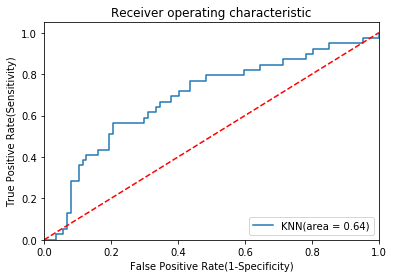

In [13]:


# predict probabilities

probs = my_svm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure()
plt.plot(fpr, tpr, label='KNN(area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix 
print('Accuracy of SVM classifier: {:.2f}'.format(my_svm.score(X_test, y_test)))
print('\n')
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [1,0]],
             index = ["Class " + str(class_name) for class_name in [1,0]])

print('Confusion matrix : \n',confusion_df.T)
print('\n')


cm1 = confusion_matrix(y_test, y_test_pred).T
print('\n')
total1=sum(sum(cm1))
print(cm1)
#####from confusion matrix calculate sensitivity specificity

tn=confusion_matrix(y_test, y_test_pred)[0, 0]
fp=confusion_matrix(y_test, y_test_pred)[0, 1]
fn=confusion_matrix(y_test, y_test_pred)[1, 0]
tp=confusion_matrix(y_test, y_test_pred)[1, 1]
#sensitivity1=tp/(tp+fn)

#print('Sensitivity :', sensitivity1 )
#print('\n')

specificity1=tn/(tn+fp)
print('Specificity :', specificity1)
print('\n')
#precision=tp/(tp+fp)
#precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#print('precision :', precision)
#print('\n')
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import recall_score
print("Recall or Sensitivity: {}".format(recall_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import matthews_corrcoef
print("Matthews Correlation Coefficient: {}".format(matthews_corrcoef(y_test, y_test_pred)))
print('\n')
##Area under Curve-AUC
auc = roc_auc_score(y_test, my_svm.predict_proba(X_test)[:,1])
print('AUC: %.3f' % auc)
print('\n')

Accuracy of SVM classifier: 0.61


Confusion matrix : 
                    Class 1  Class 0
Predicted Class 1       49       11
Predicted Class 0       38       28




[[49 11]
 [38 28]]
Specificity : 0.5632183908045977


Precision score: 0.42424242424242425


Recall or Sensitivity: 0.717948717948718


F1 Score: 0.5333333333333333


Matthews Correlation Coefficient: 0.2602608548424038


AUC: 0.686


